#  Introduction to Thompson Sampling

### Online Decision Algorithm
**Exploit vs Explore**

<div align=center> <img src="https://raw.githubusercontent.com/liangzp/Online-Learning/master/Online%20Decision%20Algorithm.png" width = "750" height = "350" alt="OnlineAlgorithm.png" align=center /></div>

## Multi-Armed Bandit problem (MAB)

<div align=center><img src ="https://raw.githubusercontent.com/liangzp/Online-Learning/master/bandits1.jpg" width = "600" height = "200" /></div>

+ News Recommendation
+ Adaptive Routing
+ $\dots$

## Bernoulli Bandit  Problem
+ K Bandits
+ T periods
+ For No.i bandit, reward 1 with probability $\theta_i, 0$ with $1-\theta_i$

<div align=center><img src ="https://raw.githubusercontent.com/liangzp/Online-Learning/master/bandit2.png" width = "800" height = "400" /></div>

+ Prior: 
    $$
    p_{\theta_k}(x)=\frac{\Gamma(\alpha_k+\beta_k)}{\Gamma(\alpha_k)\Gamma(\beta_k)} x^{\alpha_k-1}(1-x)^{\beta_k-1}
    $$
+ Likelihood:
    $$
    p(y_t|\theta_k)=\theta^{y_t}_k(1-\theta_{k})^{1-y_t}
    $$
+ Bayesian Update for Beta-Bernoulli:
    $$
    (\alpha_k,\beta_k)\leftarrow \left \{
    \begin{aligned}
     (\alpha_k,\beta_k),& & if\ x_t\neq k \\
     (\alpha_k,\beta_k)+(r_t,1-r_t),& & if \ x_t=k
    \end{aligned}
    \right.
    $$

+ Greedy Algorithm/ $\epsilon$-Greedy Algorithm: $\hat{\theta}=\mathbb{E}(\theta_k)$
+ Thompson Sampling Algorithm: $\hat{\theta}$ sample from $p_{\theta_k}$

<div align=center>
    <img src="https://raw.githubusercontent.com/liangzp/Online-Learning/master/Algorithm.png" width = "1200" height = "800" alt="Algorithm.png" align=center/>
</div>

In [4]:
from reproduce_figures import main
main("3", 0.01, "./tmp/", "./tmp/")

********************************************************************************
Reproducing Figure 3, from TS Tutorial https://arxiv.org/abs/1707.02038
With run_frac 0.01 this will launch 200 jobs, compared to 20000 in the paper.
The config file with all necessary details of the underlying experiment is 
   finite_arm.config_simple.
The experiment results are saved to ./tmp/ with experiment_id finite_simple.
The output plots are saved to ./tmp/ with experiment_id finite_simple.


********************************************************************************
Starting job 0 out of 200
python batch_runner.py --config finite_arm.config_simple --job_id 0 --save_path ./tmp/
Starting job 1 out of 200
python batch_runner.py --config finite_arm.config_simple --job_id 1 --save_path ./tmp/
Starting job 2 out of 200
python batch_runner.py --config finite_arm.config_simple --job_id 2 --save_path ./tmp/
Starting job 3 out of 200
python batch_runner.py --config finite_arm.config_simple --job_id 3 

Starting job 67 out of 200
python batch_runner.py --config finite_arm.config_simple --job_id 67 --save_path ./tmp/
Starting job 68 out of 200
python batch_runner.py --config finite_arm.config_simple --job_id 68 --save_path ./tmp/
Starting job 69 out of 200
python batch_runner.py --config finite_arm.config_simple --job_id 69 --save_path ./tmp/
Starting job 70 out of 200
python batch_runner.py --config finite_arm.config_simple --job_id 70 --save_path ./tmp/
Starting job 71 out of 200
python batch_runner.py --config finite_arm.config_simple --job_id 71 --save_path ./tmp/
Starting job 72 out of 200
python batch_runner.py --config finite_arm.config_simple --job_id 72 --save_path ./tmp/
Starting job 73 out of 200
python batch_runner.py --config finite_arm.config_simple --job_id 73 --save_path ./tmp/
Starting job 74 out of 200
python batch_runner.py --config finite_arm.config_simple --job_id 74 --save_path ./tmp/
Starting job 75 out of 200
python batch_runner.py --config finite_arm.config_sim

Starting job 138 out of 200
python batch_runner.py --config finite_arm.config_simple --job_id 138 --save_path ./tmp/
Starting job 139 out of 200
python batch_runner.py --config finite_arm.config_simple --job_id 139 --save_path ./tmp/
Starting job 140 out of 200
python batch_runner.py --config finite_arm.config_simple --job_id 140 --save_path ./tmp/
Starting job 141 out of 200
python batch_runner.py --config finite_arm.config_simple --job_id 141 --save_path ./tmp/
Starting job 142 out of 200
python batch_runner.py --config finite_arm.config_simple --job_id 142 --save_path ./tmp/
Starting job 143 out of 200
python batch_runner.py --config finite_arm.config_simple --job_id 143 --save_path ./tmp/
Starting job 144 out of 200
python batch_runner.py --config finite_arm.config_simple --job_id 144 --save_path ./tmp/
Starting job 145 out of 200
python batch_runner.py --config finite_arm.config_simple --job_id 145 --save_path ./tmp/
Starting job 146 out of 200
python batch_runner.py --config fini

In [ ]:
"""
Environment
"""
class FiniteArmedBernoulliBandit(Environment):
  """Simple N-armed bandit."""

  def __init__(self, probs):
    self.probs = np.array(probs)
    assert np.all(self.probs >= 0)
    assert np.all(self.probs <= 1)

    self.optimal_reward = np.max(self.probs)
    self.n_arm = len(self.probs)

  def get_observation(self):
    return self.n_arm

  def get_optimal_reward(self):
    return self.optimal_reward

  def get_expected_reward(self, action):
    return self.probs[action]

  def get_stochastic_reward(self, action):
    return np.random.binomial(1, self.probs[action])

In [ ]:
"""
Agent 1: Greedy
"""
class FiniteBernoulliBanditEpsilonGreedy(Agent):
  """Simple agent made for finite armed bandit problems."""

  def get_posterior_mean(self):
    return self.prior_success / (self.prior_success + self.prior_failure)

  def get_posterior_sample(self):
    return np.random.beta(self.prior_success, self.prior_failure)

  def update_observation(self, observation, action, reward):
    # Naive error checking for compatibility with environment
    assert observation == self.n_arm

    if np.isclose(reward, 1):
      self.prior_success[action] += 1
    elif np.isclose(reward, 0):
      self.prior_failure[action] += 1
    else:
      raise ValueError('Rewards should be 0 or 1 in Bernoulli Bandit')

  def pick_action(self, observation):
    """Take random action prob epsilon, else be greedy."""
    if np.random.rand() < self.epsilon:
      action = np.random.randint(self.n_arm)
    else:
      posterior_means = self.get_posterior_mean()
      action = random_argmax(posterior_means)

    return action

In [ ]:
"""
Agent 2: TS
"""
class FiniteBernoulliBanditTS(FiniteBernoulliBanditEpsilonGreedy):
  """Thompson sampling on finite armed bandit."""

  def pick_action(self, observation):
    """Thompson sampling with Beta posterior for action selection."""
    sampled_means = self.get_posterior_sample()
    action = random_argmax(sampled_means)
    return action

<div align=center><img src="https://raw.githubusercontent.com/liangzp/Online-Learning/master/finite_simple_greedy_action.png" width = "800" height = "400" alt="finite_simple_greedy_action" align=center/></div>

<div align=center><img src="https://raw.githubusercontent.com/liangzp/Online-Learning/master/finite_simple_ts_action.png" width = "800" height = "400" alt="finite_simple_ts_action" align=center/></div>

## Approximations

### 1. Laplace Approximation

$$
ln(g(\phi))\approx ln(g(\overline{\phi}))-\frac{1}{2}(\phi-\overline{\phi})^T C (\phi-\overline{\phi})
$$
where $\overline{\phi}$ is its mode and $C=-\nabla^2 ln(g(\overline{\phi}))$

$$g(\phi) \propto e^{-\frac{1}{2}(\phi-\overline{\phi})^T C (\phi-\overline{\phi})}$$
<br/>
$$g(\phi) =\sqrt{\frac{C}{2\pi}}e^{-\frac{1}{2}(\phi-\overline{\phi})^T C (\phi-\overline{\phi})}$$


<div align=center><img src="https://raw.githubusercontent.com/liangzp/Online-Learning/master/laplace_modes.png" width = "350" height = "250" alt="Laplace" align=center/></div>


**Bernoulli**:

$$
\begin{aligned}
f(\theta)&\propto \theta^s(1-\theta)^{n-s}\\
ln f(\theta)&=const+sln(\theta)+(n-s)ln(1-\theta)\\
\frac{dL(\theta)}{d\theta}&=\frac{s}{\theta}-\frac{n-s}{1-\theta}=0\rightarrow \theta_0=\frac{s}{n}=\overline{\phi}\\
\frac{d^2L(\theta)}{d\theta^2}&=-\frac{s}{\theta^2}-\frac{n-s}{(1-\theta)^2}=-\frac{n}{\theta(1-\theta)}=C\\
\end{aligned}
$$

In [ ]:
class FiniteBernoulliBanditLaplace(FiniteBernoulliBanditTS):
  """Laplace Thompson sampling on finite armed bandit."""

  def get_posterior_sample(self):
    """Gaussian approximation to posterior density (match moments)."""
    (a, b) = (self.prior_success + 1e-6 - 1, self.prior_failure + 1e-6 - 1)
    # The modes are not well defined unless alpha, beta > 1
    assert np.all(a > 0)
    assert np.all(b > 0)
    mode = a / (a + b)
    #hessian = a / mode + b / (1 - mode)
    hessian = (a+b)/(mode*(1-mode))
    laplace_sample = mode + np.sqrt(1 / hessian) * np.random.randn(self.n_arm)
    return laplace_sample

### 2. Langevin Monte Carlo

$$
d\phi_t=\nabla ln(g(\phi_t))dt+\sqrt{2}dB_t
$$

##### Euler discretization
$$
\phi_{n+1}=\phi_n+\epsilon\nabla ln(g(\phi_n))+\sqrt{2\epsilon}W_n
$$

##### Modification 1: Stochastic gradient Langevin Monte Carlo
<br/>
<center>Exact gradients $\rightarrow$Mini-batches approximate</center>


##### Modification 2: Preconditioning matrix

<br/>
$$
\phi_{n+1}=\phi_n+\epsilon A \nabla ln(g(\phi_n))+\sqrt{2\epsilon}AW_n
$$

<br/>
where $A=-(\nabla^2 ln(g(\phi))|_{\phi=\phi_0})^{-1}$ and $W_n\sim N(0,1)$


**How to understand**

<div align=center><img src="https://raw.githubusercontent.com/liangzp/Online-Learning/master/Precondition.png" width = "1000" height = "800" alt="Precondition" align=center/></div>

In [4]:
class Agent(object):
  """Base class for all bandit agents."""

  def __init__(self):
    """Initialize the agent."""
    pass

  def update_observation(self, observation, action, reward):
    """Add an observation to the records."""
    pass

  def pick_action(self, observation):
    """Select an action based upon the policy + observation."""
    pass


class FiniteBernoulliBanditEpsilonGreedy(Agent):
  """Simple agent made for finite armed bandit problems."""

  def __init__(self, n_arm, a0=1, b0=1, epsilon=0.0):
    self.n_arm = n_arm
    self.epsilon = epsilon
    self.prior_success = np.array([a0 for arm in range(n_arm)])
    self.prior_failure = np.array([b0 for arm in range(n_arm)])

  def set_prior(self, prior_success, prior_failure):
    # Overwrite the default prior
    self.prior_success = np.array(prior_success)
    self.prior_failure = np.array(prior_failure)

  def get_posterior_mean(self):
    return self.prior_success / (self.prior_success + self.prior_failure)

  def get_posterior_sample(self):
    return np.random.beta(self.prior_success, self.prior_failure)

  def update_observation(self, observation, action, reward):
    # Naive error checking for compatibility with environment
    assert observation == self.n_arm

    if np.isclose(reward, 1):
      self.prior_success[action] += 1
    elif np.isclose(reward, 0):
      self.prior_failure[action] += 1
    else:
      raise ValueError('Rewards should be 0 or 1 in Bernoulli Bandit')

  def pick_action(self, observation):
    """Take random action prob epsilon, else be greedy."""
    if np.random.rand() < self.epsilon:
      action = np.random.randint(self.n_arm)
    else:
      posterior_means = self.get_posterior_mean()
      action = random_argmax(posterior_means)

    return action

class FiniteBernoulliBanditTS(FiniteBernoulliBanditEpsilonGreedy):
  """Thompson sampling on finite armed bandit."""

  def pick_action(self, observation):
    """Thompson sampling with Beta posterior for action selection."""
    sampled_means = self.get_posterior_sample()
    action = random_argmax(sampled_means)
    return action

In [21]:
class FiniteBernoulliBanditLangevin(FiniteBernoulliBanditTS):
  '''Langevin method for approximate posterior sampling.''' 
  def __init__(self,n_arm, step_count=1000,step_size=0.01,a0=1, b0=1, epsilon=0.0):
    FiniteBernoulliBanditTS.__init__(self,n_arm, a0, b0, epsilon)
    self.step_count = step_count
    self.step_size = step_size
  
  def project(self,x):
    '''projects the vector x onto [_SMALL_NUMBER,1-_SMALL_NUMBER] to prevent
    numerical overflow.'''
    return np.minimum(1-_SMALL_NUMBER,np.maximum(x,_SMALL_NUMBER))
  
  def compute_gradient(self,x):
    grad = (self.prior_success-1)/x - (self.prior_failure-1)/(1-x)
    return grad
    
  def compute_preconditioners(self,x):
    second_derivatives = (self.prior_success-1)/(x**2) + (self.prior_failure-1)/((1-x)**2)
    second_derivatives = np.maximum(second_derivatives,_SMALL_NUMBER)
    preconditioner = np.diag(1/second_derivatives)
    preconditioner_sqrt = np.diag(1/np.sqrt(second_derivatives))
    return preconditioner,preconditioner_sqrt

In [22]:
  def get_posterior_sample(self):
    (a, b) = (self.prior_success + 1e-6 - 1, self.prior_failure + 1e-6 - 1)
    # The modes are not well defined unless alpha, beta > 1
    assert np.all(a > 0)
    assert np.all(b > 0)
    x_map = a / (a + b)
    x_map = self.project(x_map)
    
    preconditioner, preconditioner_sqrt=self.compute_preconditioners(x_map)
   
    x = x_map
    for i in range(self.step_count):
      g = self.compute_gradient(x)
      scaled_grad = preconditioner.dot(g)
      scaled_noise= preconditioner_sqrt.dot(np.random.randn(self.n_arm)) 
      x = x + self.step_size*scaled_grad + np.sqrt(2*self.step_size)*scaled_noise
      x = self.project(x)
      
    return x

### 3. Bootstrapping

1. Generate a hypothetical history $\mathbb{\hat{H}}_{t-1}=((\hat{x}_1,\hat{y}_1),\dots,(\hat{x}_{t-1},\hat{y}_{t-1}))$
2. $Max_{\theta} \ \ \ Likehood(\theta)$

In [ ]:
class FiniteBernoulliBanditBootstrap(FiniteBernoulliBanditTS):
  """Bootstrapped Thompson sampling on finite armed bandit."""

  def get_posterior_sample(self):
    """Use bootstrap resampling instead of posterior sample."""
    total_tries = self.prior_success + self.prior_failure
    prob_success = self.prior_success / total_tries
    boot_sample = np.random.binomial(total_tries, prob_success) / total_tries
    return boot_sample

<div align=center><img src="https://raw.githubusercontent.com/liangzp/Online-Learning/master/Approximation2.png" width = "1008" height = "800" alt="approximation2" align=center/></div>

<div align=center><img src="https://raw.githubusercontent.com/liangzp/Online-Learning/master/finite_simple_sanity_simple.png" width = "1000" height = "800" alt="Sanity Check" align=center/></div>

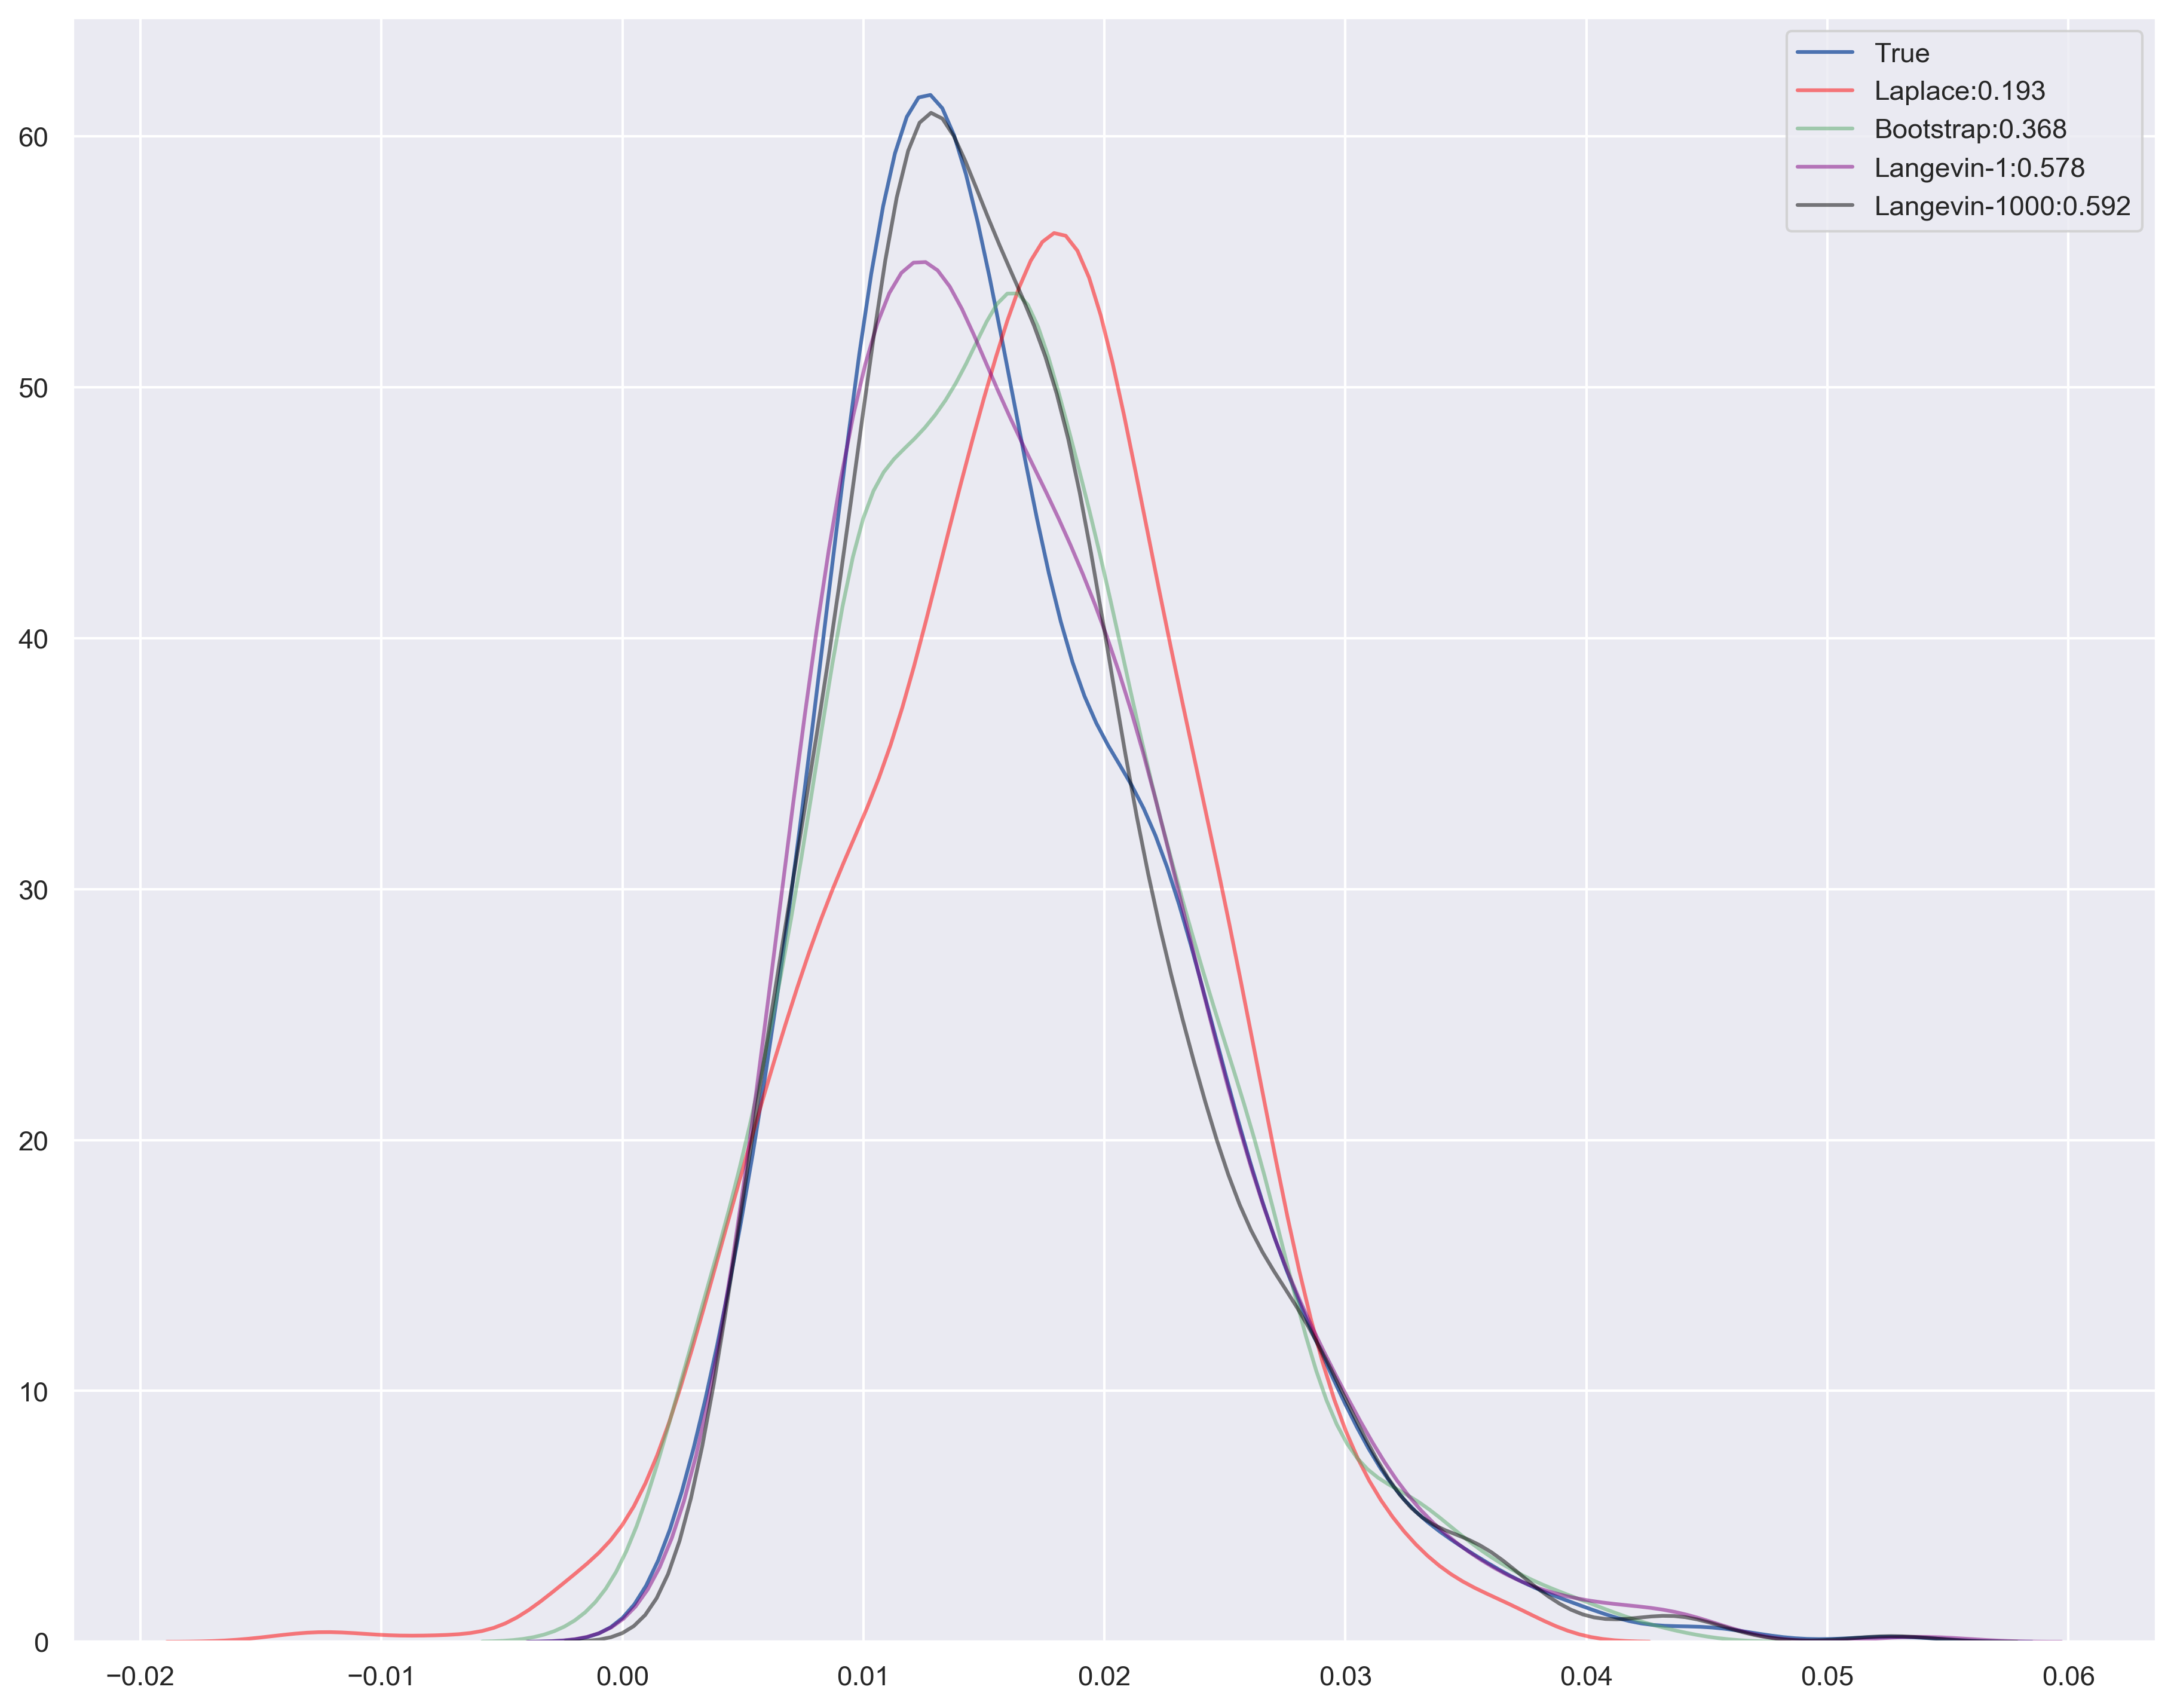

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(color_codes=True)

import warnings
warnings.filterwarnings('ignore')

import time

#Init
a=5
b=300
N=1000

plt.rcParams['figure.figsize']=(15,12)
plt.rcParams['figure.dpi']=300


#True distribution
true=np.random.beta(a,b,N)
sns.distplot(np.random.beta(a,b,N),kde_kws={"label":"True"},hist=False)


#Laplace Approximation
start = time.clock()
mode = a / (a + b)
#hessian = a / mode + b / (1 - mode)
hessian = (a+b)/(mode*(1-mode))
laplace_sample = mode + np.sqrt(1 / hessian) * np.random.randn(N)
elapsed =round((time.clock() - start)*1000,3)
sns.distplot(laplace_sample,kde_kws={"label":"Laplace:"+str(elapsed),"color":"red","alpha":0.5},hist=False)

#Bootstrap
start = time.clock()
total_tries = a+b
prob_success = a / total_tries
boot_sample = np.random.binomial(total_tries, prob_success,N) / total_tries
elapsed =round((time.clock() - start)*1000,3)
sns.distplot(boot_sample,kde_kws={"label":"Bootstrap:"+str(elapsed),"alpha":0.5},hist=False) 


#Langevin Sampling
start = time.clock()
Langevin=FiniteBernoulliBanditLangevin(N,step_count=1)
Langevin.set_prior(a*np.ones(N),b*np.ones(N))
Langevin_sample=Langevin.get_posterior_sample()
elapsed =round((time.clock() - start)*1000,3)
sns.distplot(Langevin_sample,kde_kws={"label":"Langevin-1:"+str(elapsed),"color":'purple',"alpha":0.5},hist=False) 

start = time.clock()
Langevin=FiniteBernoulliBanditLangevin(N,step_count=1000)
Langevin.set_prior(a*np.ones(N),b*np.ones(N))
Langevin_sample=Langevin.get_posterior_sample()
elapsed =round((time.clock() - start)*1000,3)
sns.distplot(Langevin_sample,kde_kws={"label":"Langevin-1000:"+str(elapsed),"color":'black',"alpha":0.5},hist=False) 

plt.legend()

### Incremental Implementation

**Incremental version of the Laplace approximation**
$$
\begin{aligned}
H_t=H_{t-1}+\nabla^2 g_t(\overline{\theta}_{t-1})\\
\overline{\theta}_t=\overline{\theta}_{t-1}-H_t^{-1}\nabla g_t(\overline{\theta}_{t-1})
\end{aligned}
$$

where $g_t(\theta)=ln(l_t(\theta))$  and  $\overline{\theta}_k=argmax_{\theta}g_k(\theta)$